<a href="https://colab.research.google.com/github/YusufAbdurrahmann/house-predict/blob/main/house_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("sample_data/house.csv")
df.head()

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
0,6300000.0,Secondary,Опалиха,6.0,Moscow region,1.0,30.6,11.1,8.5,25.0,25,Cosmetic
1,9000000.0,Secondary,Павшино,2.0,Moscow region,1.0,49.2,20.0,10.0,6.0,15,European-style renovation
2,11090000.0,Secondary,Мякинино,14.0,Moscow region,1.0,44.7,16.2,13.1,10.0,25,Cosmetic
3,8300000.0,Secondary,Строгино,8.0,Moscow region,1.0,35.1,16.0,11.0,12.0,33,European-style renovation
4,6450000.0,Secondary,Опалиха,6.0,Moscow region,1.0,37.7,15.2,4.0,5.0,5,Without renovation


# **Data Understanding**

In [84]:
print(df.shape)

(22676, 12)


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22676 entries, 0 to 22675
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             22676 non-null  float64
 1   Apartment type    22676 non-null  object 
 2   Metro station     22676 non-null  object 
 3   Minutes to metro  22676 non-null  float64
 4   Region            22676 non-null  object 
 5   Number of rooms   22676 non-null  float64
 6   Area              22676 non-null  float64
 7   Living area       22676 non-null  float64
 8   Kitchen area      22676 non-null  float64
 9   Floor             22676 non-null  float64
 10  Number of floors  22676 non-null  int64  
 11  Renovation        22676 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 2.1+ MB


# **Data Cleaning**

In [86]:
df.isnull().sum()

,0
Price,0
Apartment type,0
Metro station,0
Minutes to metro,0
Region,0
Number of rooms,0
Area,0
Living area,0
Kitchen area,0
Floor,0


In [87]:
df.duplicated().sum()

1835

In [89]:
df = df.drop_duplicates()

# **Explanatory Data Analysist (EDA)**

In [90]:
df

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
0,6300000.0,Secondary,Опалиха,6.0,Moscow region,1.0,30.60,11.1,8.5,25.0,25,Cosmetic
1,9000000.0,Secondary,Павшино,2.0,Moscow region,1.0,49.20,20.0,10.0,6.0,15,European-style renovation
2,11090000.0,Secondary,Мякинино,14.0,Moscow region,1.0,44.70,16.2,13.1,10.0,25,Cosmetic
3,8300000.0,Secondary,Строгино,8.0,Moscow region,1.0,35.10,16.0,11.0,12.0,33,European-style renovation
4,6450000.0,Secondary,Опалиха,6.0,Moscow region,1.0,37.70,15.2,4.0,5.0,5,Without renovation
...,...,...,...,...,...,...,...,...,...,...,...,...
22670,5884024.0,New building,Котельники,8.0,Moscow region,1.0,44.17,24.5,10.3,4.0,17,Cosmetic
22672,5900000.0,New building,Домодедовская,25.0,Moscow region,1.0,31.60,10.1,12.2,11.0,15,Cosmetic
22673,3700000.0,New building,Котельники,30.0,Moscow region,0.0,18.00,15.0,8.1,17.0,17,Cosmetic
22674,5768869.0,New building,Жулебино,14.0,Moscow region,2.0,36.39,22.0,6.6,12.0,14,Cosmetic


<ipython-input-91-0bda17601a71>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Apartment type", data=df, palette="pastel")


<Axes: xlabel='Apartment type', ylabel='count'>

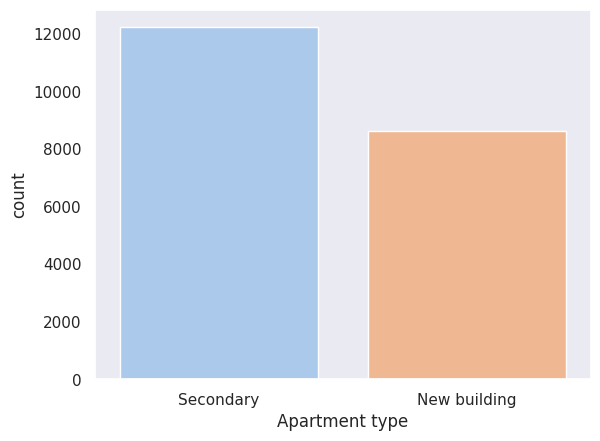

In [91]:
sns.set_theme(style="dark")
sns.countplot(x="Apartment type", data=df, palette="pastel")

# **Data Preperation**

In [122]:
df

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
0,6300000.0,1,143,6.0,1,1.0,30.60,11.1,8.5,25.0,25,0
1,9000000.0,1,150,2.0,1,1.0,49.20,20.0,10.0,6.0,15,2
2,11090000.0,1,118,14.0,1,1.0,44.70,16.2,13.1,10.0,25,0
3,8300000.0,1,205,8.0,1,1.0,35.10,16.0,11.0,12.0,33,2
4,6450000.0,1,143,6.0,1,1.0,37.70,15.2,4.0,5.0,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...
22670,5884024.0,0,351,8.0,1,1.0,44.17,24.5,10.3,4.0,17,0
22672,5900000.0,0,326,25.0,1,1.0,31.60,10.1,12.2,11.0,15,0
22673,3700000.0,0,351,30.0,1,0.0,18.00,15.0,8.1,17.0,17,0
22674,5768869.0,0,329,14.0,1,2.0,36.39,22.0,6.6,12.0,14,0


In [123]:
at = LabelEncoder()
ms = LabelEncoder()
rg = LabelEncoder()
rv = LabelEncoder()

df["Apartment type"] = at.fit_transform(df["Apartment type"])
df["Metro station"] = ms.fit_transform(df["Metro station"])
df["Region"] = rg.fit_transform(df["Region"])
df["Renovation"] = rv.fit_transform(df["Renovation"])

In [124]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [125]:
X = df.drop(columns = ["Region"])
y = df["Region"]

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

# **Modelling**

In [132]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)


print("Akurasi : {:.2f} %".format(accuracy*100))

Akurasi : 87.77 %
